In [1]:
#Package loading
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import random

In [2]:
#CSV loading
#Data loading
dataset2 = pd.read_csv('Z1 - completepicturecustomer1yearP3MC4.csv',index_col = 'Unnamed: 0', parse_dates = ['LastInvoice', 'Timestamp'])

dataset2.set_index(['CustomerID', 'Timestamp'], inplace = True)
dataset2.head()

dataset2.head()

,,LastInvoice,Recency,SpentMin,SpentMax,SpentMean,SpentSum,SpentStd,OrderSepMean,OrderSepMax,OrderSepMin,...,Weekday_6_Sunday_sum,Weekday_6_Sunday_mean,Weekday_6_Sunday_std,F,R,M,D,RatioCancel,C,RFMDC
CustomerID,Timestamp,,,,,,,,,,,,,,,,,,,,,
12748.0,2010-12-03,2010-12-02 11:46:00,0,4.25,4.95,4.60,9.20,0.494975,0.0,0,0,...,0.0,0.0,0.0,1,2,4,3,0.0,1,21431
12838.0,2010-12-03,2010-12-01 11:57:00,1,390.79,390.79,390.79,390.79,0.000000,0.0,0,0,...,0.0,0.0,0.0,3,4,1,1,0.0,1,43111
12855.0,2010-12-03,2010-12-02 09:37:00,0,38.10,38.10,38.10,38.10,0.000000,0.0,0,0,...,0.0,0.0,0.0,3,2,4,2,0.0,1,23421
12868.0,2010-12-03,2010-12-01 12:50:00,1,203.30,203.30,203.30,203.30,0.000000,0.0,0,0,...,0.0,0.0,0.0,3,4,3,3,0.0,1,43331
12915.0,2010-12-03,2010-12-02 12:33:00,0,199.65,199.65,199.65,199.65,0.000000,0.0,0,0,...,0.0,0.0,0.0,3,2,3,2,0.0,1,23321


In [3]:
#Sample dowsizing
samplesize = 10000
rows = random.sample(list(dataset2.index), samplesize)
dataset = dataset2.loc[rows]
dataset.head()

,,LastInvoice,Recency,SpentMin,SpentMax,SpentMean,SpentSum,SpentStd,OrderSepMean,OrderSepMax,OrderSepMin,...,Weekday_6_Sunday_sum,Weekday_6_Sunday_mean,Weekday_6_Sunday_std,F,R,M,D,RatioCancel,C,RFMDC
CustomerID,Timestamp,,,,,,,,,,,,,,,,,,,,,
17183.0,2011-10-12,2011-08-26 15:25:00,46,329.67,329.67,329.670,329.67,0.000000,0.0,0,0,...,0.00,0.000,0.000000,4,3,3,3,0.00000,1,34331
17886.0,2011-07-08,2011-05-13 10:22:00,55,157.77,219.94,188.855,377.71,43.960829,19.0,38,0,...,0.00,0.000,0.000000,2,3,3,3,0.00000,1,32331
14861.0,2011-11-16,2011-10-18 12:54:00,28,125.79,125.79,125.790,125.79,0.000000,0.0,0,0,...,0.00,0.000,0.000000,4,3,4,4,0.00000,1,34441
12909.0,2011-10-12,2011-09-23 07:58:00,18,-7.39,328.98,160.795,321.59,237.849508,56.0,103,9,...,0.00,0.000,0.000000,2,2,3,3,-0.02298,2,22332
17114.0,2011-02-25,2011-02-15 13:50:00,9,127.95,140.59,134.270,268.54,8.937830,18.5,37,0,...,140.59,70.295,99.412142,2,1,3,2,0.00000,1,12321


In [4]:
xcol = list(dataset.columns.values)
#xcol.remove('firstpurchase')
#xcol.remove('lastpurchase')
#xcol.remove('R')
#xcol.remove('F')
#xcol.remove('M')
#xcol.remove('D')
#xcol.remove('C')
xcol.remove('RFMDC')
xcol.remove('LastInvoice')

xcol

['Recency',
 'SpentMin',
 'SpentMax',
 'SpentMean',
 'SpentSum',
 'SpentStd',
 'OrderSepMean',
 'OrderSepMax',
 'OrderSepMin',
 'OrderSepStd',
 'Frequency',
 'DiscountMean',
 'DiscountMax',
 'DiscountMin',
 'DiscountStd',
 'SavingsSum',
 'SavingsMean',
 'SavingsMax',
 'SavingsMin',
 'SavingsStd',
 'AmountCancelledSum',
 'AmountCancelledMean',
 'AmountCancelledMin',
 'AmountCancelledMax',
 'AmountCancelledStd',
 'QuantUnitPrice_01_sum',
 'QuantUnitPrice_01_mean',
 'QuantUnitPrice_01_amin',
 'QuantUnitPrice_01_amax',
 'QuantUnitPrice_01_std',
 'QuantUnitPrice_02_sum',
 'QuantUnitPrice_02_mean',
 'QuantUnitPrice_02_amin',
 'QuantUnitPrice_02_amax',
 'QuantUnitPrice_02_std',
 'QuantUnitPrice_03_sum',
 'QuantUnitPrice_03_mean',
 'QuantUnitPrice_03_amin',
 'QuantUnitPrice_03_amax',
 'QuantUnitPrice_03_std',
 'QuantUnitPrice_04_sum',
 'QuantUnitPrice_04_mean',
 'QuantUnitPrice_04_amin',
 'QuantUnitPrice_04_amax',
 'QuantUnitPrice_04_std',
 'QuantUnitPrice_05_sum',
 'QuantUnitPrice_05_mean',
 

In [5]:
#Groups to watch

purchasehabit = []
purchasehabit.extend([x for x in xcol if x.startswith('QuantUnitPrice') and (x.endswith('mean'))])
purchasehabit.extend([x for x in xcol if x.startswith('QuantUnitSavings') and (x.endswith('mean'))])

timeseries = []
timeseries.extend([x for x in xcol if x.startswith('Daytime') and (x.endswith('mean'))])
timeseries.extend([x for x in xcol if x.startswith('Month') and (x.endswith('mean'))])
timeseries.extend([x for x in xcol if x.startswith('Weekday') and (x.endswith('mean'))])

generalinfo = ['Recency', 'SpentMean', 'SpentSum', 'Frequency', 'OrderSepMean', 'OrderSepStd', 'AmountCancelledSum']
datasetcomposition = {'generalinfo':generalinfo, 'purchasehabit':purchasehabit, 'timeseries':timeseries}
datasetcomposition

{'generalinfo': ['Recency',
  'SpentMean',
  'SpentSum',
  'Frequency',
  'OrderSepMean',
  'OrderSepStd',
  'AmountCancelledSum'],
 'purchasehabit': ['QuantUnitPrice_01_mean',
  'QuantUnitPrice_02_mean',
  'QuantUnitPrice_03_mean',
  'QuantUnitPrice_04_mean',
  'QuantUnitPrice_05_mean',
  'QuantUnitSavings_01_mean',
  'QuantUnitSavings_02_mean',
  'QuantUnitSavings_03_mean',
  'QuantUnitSavings_04_mean',
  'QuantUnitSavings_05_mean'],
 'timeseries': ['Daytime_Monetary_1_mean',
  'Daytime_Monetary_2_mean',
  'Daytime_Monetary_3_mean',
  'Month_01_mean',
  'Month_02_mean',
  'Month_03_mean',
  'Month_04_mean',
  'Month_05_mean',
  'Month_06_mean',
  'Month_07_mean',
  'Month_08_mean',
  'Month_09_mean',
  'Month_10_mean',
  'Month_11_mean',
  'Month_12_mean',
  'Weekday_0_Monday_mean',
  'Weekday_1_Tuesday_mean',
  'Weekday_2_Wednesday_mean',
  'Weekday_3_Thursday_mean',
  'Weekday_4_Friday_mean',
  'Weekday_6_Sunday_mean']}

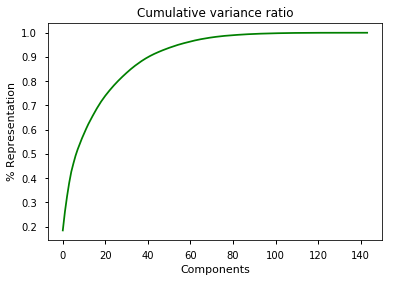

In [6]:
#Data preparation
X = dataset[xcol]
y = dataset[['R', 'F', 'M', 'D', 'C']]

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
component = X.shape[1]
pca = decomposition.PCA(n_components=component)
pca.fit(X_scaled)

# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)



componantsprinc = pca.explained_variance_ratio_
componantsprinccumsum = pca.explained_variance_ratio_.cumsum()


plt.plot(range(component), componantsprinccumsum, color = 'green')
plt.title('Cumulative variance ratio')
plt.ylabel('% Representation')
plt.xlabel('Components')
plt.show()

In [7]:
X.isnull().sum(axis=0)

Recency                     0
SpentMin                    0
SpentMax                    0
SpentMean                   0
SpentSum                    0
SpentStd                    0
OrderSepMean                0
OrderSepMax                 0
OrderSepMin                 0
OrderSepStd                 0
Frequency                   0
DiscountMean                0
DiscountMax                 0
DiscountMin                 0
DiscountStd                 0
SavingsSum                  0
SavingsMean                 0
SavingsMax                  0
SavingsMin                  0
SavingsStd                  0
AmountCancelledSum          0
AmountCancelledMean         0
AmountCancelledMin          0
AmountCancelledMax          0
AmountCancelledStd          0
QuantUnitPrice_01_sum       0
QuantUnitPrice_01_mean      0
QuantUnitPrice_01_amin      0
QuantUnitPrice_01_amax      0
QuantUnitPrice_01_std       0
                           ..
Month_11_sum                0
Month_11_mean               0
Month_11_s

In [7]:
#Reduction de dimension
pca = decomposition.PCA(n_components=40)
pca.fit(X_scaled)
Xtransf = pca.transform(X_scaled)
Xtransf

array([[-1.46778901,  0.55283492,  0.60503464, ..., -0.36933559,
        -0.79645316,  0.25169111],
       [-0.95715208,  0.32572814, -0.07343058, ..., -0.66117702,
         0.34182113, -0.37233622],
       [-1.9232288 , -0.30974048,  1.06143641, ...,  0.58400896,
         1.12286003, -0.0748143 ],
       ..., 
       [ 1.86689016, -1.1954866 , -0.46787585, ..., -0.22962875,
         1.82226319,  0.90205685],
       [-1.83912174,  0.46517639,  0.59784711, ..., -0.17890067,
         0.05528502, -0.0622324 ],
       [-2.66662164,  0.50724921,  0.08027493, ..., -0.40718997,
         0.00337401, -0.1901072 ]])

silhouette ratio = 89.780% for 2 clusters
silhouette ratio = 89.170% for 3 clusters
silhouette ratio = 87.082% for 4 clusters
silhouette ratio = 84.352% for 5 clusters
silhouette ratio = 82.979% for 6 clusters
silhouette ratio = 73.683% for 7 clusters
silhouette ratio = 82.555% for 8 clusters
silhouette ratio = 12.249% for 9 clusters
silhouette ratio = 11.012% for 10 clusters
silhouette ratio = 9.870% for 11 clusters
silhouette ratio = 16.647% for 12 clusters
silhouette ratio = 10.180% for 13 clusters
silhouette ratio = 9.947% for 14 clusters
silhouette ratio = 9.751% for 15 clusters
silhouette ratio = 9.826% for 16 clusters
silhouette ratio = 9.640% for 17 clusters
silhouette ratio = 9.519% for 18 clusters
silhouette ratio = 9.391% for 19 clusters
silhouette ratio = 9.625% for 20 clusters
silhouette ratio = 9.841% for 21 clusters
silhouette ratio = 8.855% for 22 clusters
silhouette ratio = 2.616% for 23 clusters
silhouette ratio = 9.686% for 24 clusters


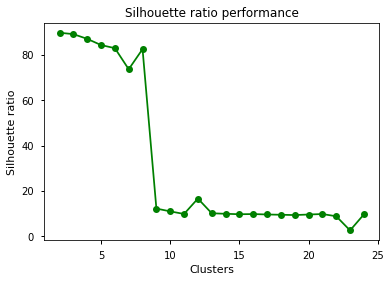

In [9]:
listclusters = range(2,25)
listsilhouette = []

for numcluster in listclusters:
    kmeans = KMeans(n_clusters=numcluster, n_jobs = 3)
    kmeans.fit(X_scaled)
    #Calcul de silhouette
    labels = kmeans.labels_
    silhouette = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    
    print('silhouette ratio = {:.3f}% for {} clusters'.format(silhouette*100, numcluster))
    listsilhouette.append(silhouette*100)

plt.plot(listclusters, listsilhouette, 'o-', color = 'green')
plt.title('Silhouette ratio performance')
plt.ylabel('Silhouette ratio')
plt.xlabel('Clusters')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
metrics.silhouette_score(X_scaled, kmeans.labels_)

0.13073355812175114

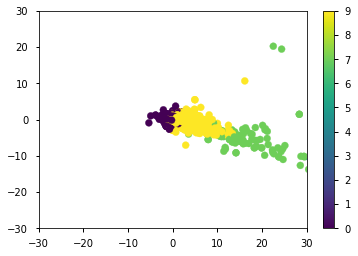

In [19]:
# projeter X sur les composantes principales
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

X_projected = pca.transform(X_scaled)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=kmeans.labels_)
plt.title('Average savings per quantiles', fontsize = 'large')
plt.ylabel('1rst Componant')
plt.xlabel('2nd Componant')
plt.xlim([-30, 30])
plt.ylim([-30, 30])
plt.colorbar()
plt.show()

In [12]:
#results comparison - Kmean
detailcom = dataset.describe()
comparison = detailcom.loc['mean']
columnnames = ['Initial']
for label in set(kmeans.labels_):
    df = dataset[kmeans.labels_ == label].describe()
    if df['R'].loc['count']>25:   #Make sure the population is big enough
        columnnames.append(label)
        temp = dataset[kmeans.labels_ == label].describe().loc['mean']
        temp.rename(label)
        comparison = pd.concat([comparison, temp], axis = 1)
        
comparison.columns = columnnames
comparison.T

,Recency,SpentMin,SpentMax,SpentMean,SpentSum,SpentStd,OrderSepMean,OrderSepMax,OrderSepMin,OrderSepStd,...,Weekday_6_Sunday_sum,Weekday_6_Sunday_mean,Weekday_6_Sunday_std,F,R,M,D,RatioCancel,C,RFMDC
Initial,38.851200,165.469155,505.645442,311.170989,922.281476,164.569237,31.216817,44.885000,20.754200,13.531178,...,84.892838,37.799856,25.051419,2.559800,2.488900,2.501800,2.506800,3.181661e+12,1.203400,27725.251400
0,39.913452,183.248867,364.301170,270.048629,570.156541,95.967731,31.706065,44.726091,21.486632,13.242081,...,71.251461,35.601036,20.977057,2.619888,2.528162,2.581845,2.445419,3.362212e+12,1.198880,28185.348727
1,10.281250,-641.454063,10566.622188,2927.612404,26811.401250,3651.269514,11.359993,37.656250,0.468750,13.491759,...,70.558750,3.493851,15.671687,1.031250,1.375000,1.000000,3.250000,-5.945142e-02,1.593750,14915.343750
5,20.383838,254.856586,1815.190141,851.606780,4802.961434,613.463505,23.626862,48.842424,8.482828,19.114537,...,348.319030,82.816478,104.054143,1.535354,1.814141,1.080808,3.636364,-2.537833e-02,1.264646,19822.476768


In [13]:
comparison[:50]

,Initial,0,1,5
Recency,38.851200,39.913452,10.281250,20.383838
SpentMin,165.469155,183.248867,-641.454063,254.856586
SpentMax,505.645442,364.301170,10566.622188,1815.190141
SpentMean,311.170989,270.048629,2927.612404,851.606780
SpentSum,922.281476,570.156541,26811.401250,4802.961434
SpentStd,164.569237,95.967731,3651.269514,613.463505
OrderSepMean,31.216817,31.706065,11.359993,23.626862
OrderSepMax,44.885000,44.726091,37.656250,48.842424
OrderSepMin,20.754200,21.486632,0.468750,8.482828
OrderSepStd,13.531178,13.242081,13.491759,19.114537


In [14]:
comparison[50:100]

,Initial,0,1,5
QuantUnitSavings_01_sum,-7.133362,-2.313848,-265.267187,-90.026364
QuantUnitSavings_01_mean,-2.622541,-1.507376,-13.279299,-23.596941
QuantUnitSavings_01_amin,-6.554392,-3.111154,-211.268438,-59.277737
QuantUnitSavings_01_amax,-0.036821,-0.186737,51.480312,-5.860303
QuantUnitSavings_01_std,2.918535,1.573430,69.307879,23.318368
QuantUnitSavings_02_sum,-9.703278,-4.064799,-173.218125,-114.351232
QuantUnitSavings_02_mean,-3.195825,-2.054943,10.315092,-26.244371
QuantUnitSavings_02_amin,-8.613586,-4.374124,-218.583125,-74.210384
QuantUnitSavings_02_amax,0.222332,-0.329065,188.969375,-3.864889
QuantUnitSavings_02_std,3.983408,2.169334,123.487905,29.984237


In [15]:
comparison[100:]

,Initial,0,1,5
Month_06_mean,2.805157e+01,2.444092e+01,172.480140,38.591554
Month_06_std,2.984360e+01,1.983715e+01,561.506395,89.486520
Month_07_sum,8.816038e+01,4.907522e+01,2686.694063,539.754303
Month_07_mean,2.638109e+01,2.169608e+01,145.908819,102.057386
Month_07_std,2.708803e+01,1.823907e+01,495.317524,151.545320
Month_08_sum,8.969419e+01,4.949061e+01,4170.177813,525.838263
Month_08_mean,2.663399e+01,2.151558e+01,478.014345,92.979788
Month_08_std,2.954405e+01,1.835140e+01,1302.416421,150.009622
Month_09_sum,9.738766e+01,5.430094e+01,1588.954375,441.008788
Month_09_mean,3.043872e+01,2.620295e+01,118.061277,92.019477


In [21]:
comparison.loc[['R', 'F', 'M', 'D', 'C']]

,Initial,0,1,5
R,2.4889,2.528162,1.37500,1.814141
F,2.5598,2.619888,1.03125,1.535354
M,2.5018,2.581845,1.00000,1.080808
D,2.5068,2.445419,3.25000,3.636364
C,1.2034,1.198880,1.59375,1.264646


In [9]:
from sklearn.model_selection import ParameterGrid
parameters = {'eps':np.arange(6, 9, .5), 'algorithm':[ 'ball_tree', 'kd_tree'],}
             #'leaf_size':np.arange(5, 50, 5)}
#ParameterGrid(parameters)[1]
resultsilhouette = []
clustercount = []
for param in ParameterGrid(parameters):
    db = DBSCAN(**param).fit(X_scaled)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clustercount.append(n_clusters_)
    labels = db.labels_
    silhouette = metrics.silhouette_score(X_scaled, labels)
    resultsilhouette.append(silhouette)
    print('{} clusters - silhouette ratio = {}'.format(n_clusters_, silhouette, x))
    print(param)
    print('')

NameError: name 'x' is not defined

In [10]:
epsrange = np.arange(5, 7, .25)
resultsilhouette = []
clustercount = []

for x in epsrange:
    db = DBSCAN(eps=x).fit(X_scaled)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    print('Estimated number of clusters: %d' % n_clusters_)
    clustercount.append(n_clusters_)
    #Calcul de silhouette
    labels = db.labels_
    silhouette = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    resultsilhouette.append(silhouette)
    print('silhouette ratio = {} for {} EPS'.format(silhouette, x))

Estimated number of clusters: 8
silhouette ratio = 0.17795227190961851 for 5.0 EPS
Estimated number of clusters: 10
silhouette ratio = 0.17188820388395942 for 5.25 EPS
Estimated number of clusters: 8
silhouette ratio = 0.17301002377302505 for 5.5 EPS
Estimated number of clusters: 8
silhouette ratio = 0.17469053793857492 for 5.75 EPS
Estimated number of clusters: 10
silhouette ratio = 0.23011951904601588 for 6.0 EPS
Estimated number of clusters: 7
silhouette ratio = 0.2502401995886657 for 6.25 EPS
Estimated number of clusters: 6
silhouette ratio = 0.2536195570214096 for 6.5 EPS
Estimated number of clusters: 6
silhouette ratio = 0.25344516694628183 for 6.75 EPS


In [11]:
db = DBSCAN(eps=6, algorithm = 'kd_tree').fit(X_scaled)
print('labels :', len(set(labels)) - (1 if -1 in labels else 0) )
metrics.silhouette_score(X_scaled, db.labels_)


labels : 6


0.23011951904601588

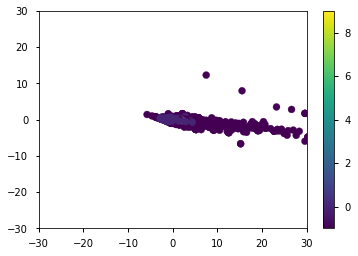

In [12]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=db.labels_)

plt.xlim([-30, 30])
plt.ylim([-30, 30])
plt.colorbar()
plt.show()

In [13]:
#results comparison - DBSCAN
detailcom = dataset.describe()
comparison = detailcom.loc['mean']
columnnames = ['Initial']
for label in set(db.labels_):
    df = dataset[db.labels_ == label].describe()
    if df['R'].loc['count']>25:   #Make sure the population is big enough
        columnnames.append(label)
        temp = dataset[db.labels_ == label].describe().loc['mean']
        temp.rename(label)
        comparison = pd.concat([comparison, temp], axis = 1)
        
comparison.columns = columnnames
comparison

,Initial,0,-1
Recency,3.949600e+01,40.733660,2.840568e+01
SpentMin,1.413933e+02,167.807759,3.680316e+02
SpentMax,5.309038e+02,332.155230,1.859406e+03
SpentMean,3.161980e+02,246.699708,9.429499e+02
SpentSum,8.918451e+02,532.329360,4.114879e+03
SpentStd,2.063706e+02,86.442721,6.318125e+02
OrderSepMean,3.181752e+01,31.982346,3.037172e+01
OrderSepMax,4.540610e+01,44.866942,5.006897e+01
OrderSepMin,2.141000e+01,21.928173,1.698174e+01
OrderSepStd,1.346323e+01,13.011106,1.722420e+01


In [14]:
comparison[:50]

,Initial,0,-1
Recency,39.496000,40.733660,28.405680
SpentMin,141.393306,167.807759,368.031613
SpentMax,530.903775,332.155230,1859.405791
SpentMean,316.198032,246.699708,942.949913
SpentSum,891.845141,532.329360,4114.878976
SpentStd,206.370550,86.442721,631.812511
OrderSepMean,31.817523,31.982346,30.371723
OrderSepMax,45.406100,44.866942,50.068966
OrderSepMin,21.410000,21.928173,16.981744
OrderSepStd,13.463229,13.011106,17.224196


In [15]:
comparison[50:100]

,Initial,0,-1
QuantUnitSavings_01_sum,-7.681541,-2.219904,-56.897850
QuantUnitSavings_01_mean,-3.065062,-1.226624,-19.662370
QuantUnitSavings_01_amin,-6.780527,-2.860745,-41.972363
QuantUnitSavings_01_amax,-0.595655,0.113710,-7.177657
QuantUnitSavings_01_std,3.033997,1.586520,15.858843
QuantUnitSavings_02_sum,-9.865827,-3.738371,-64.668722
QuantUnitSavings_02_mean,-3.469323,-1.677356,-19.580033
QuantUnitSavings_02_amin,-8.576486,-3.874609,-50.704909
QuantUnitSavings_02_amax,-0.179109,-0.099485,-1.032931
QuantUnitSavings_02_std,4.006754,1.961427,22.305576


In [16]:
comparison[100:]

,Initial,0,-1
Month_06_mean,2.678323e+01,21.323791,7.679259e+01
Month_06_std,2.901753e+01,18.388342,1.253595e+02
Month_07_sum,8.441365e+01,49.369944,3.874765e+02
Month_07_mean,2.620611e+01,20.866301,7.503997e+01
Month_07_std,2.726139e+01,18.566855,1.058127e+02
Month_08_sum,8.107564e+01,45.539287,3.848036e+02
Month_08_mean,2.500958e+01,18.608624,8.197344e+01
Month_08_std,2.732571e+01,17.817288,1.097852e+02
Month_09_sum,8.316579e+01,53.851731,3.348406e+02
Month_09_mean,3.508769e+01,25.877877,1.123299e+02
